In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm
from scipy.stats import f_oneway




In [82]:
original_dataframe = pd.read_csv(r"C:\Users\ljwil\OneDrive\Desktop\Personal Projects\Yahoo Mutal Fund Project\MutualFunds.csv")



In [83]:
rows_to_add=[]
for index, (esg_value, another_value,sector_name) in original_dataframe[['esg_score', 'fund_return_10years','fund_symbol']].iterrows():
    if pd.isna(esg_value) or pd.isna(another_value)or another_value == 'N/A' or pd.isna(sector_name):
          continue
    else:
         rows_to_add.append(original_dataframe.loc[index])


rows_df = pd.DataFrame(rows_to_add)
rows_df = rows_df.reset_index(drop=True)


esg_colum = rows_df['esg_score']
return_ten_years = rows_df['fund_return_10years']
name_column = rows_df['fund_symbol']


analysis_dataframe = pd.DataFrame({
    'Name Column': name_column,
    '10 year return': return_ten_years,
    'ESG colums': esg_colum
    })



In [84]:
print(f_oneway(esg_colum,return_ten_years))

F_onewayResult(statistic=np.float64(494794.60703384073), pvalue=np.float64(0.0))


In [85]:
def custom_describe(data):
    description = data.describe()
    description.loc['Kurtosis'] = data.kurtosis()
    description.loc['Sample Variation'] = description.loc['std'] **2   
    description.loc['Standard Error'] = description.loc['std'] / description.loc['count']
    # [n/(n-1)(n-2)] * Σ[(xi–x)/s]3
    description.loc['Skewness'] =  skew(data)
    description.loc["Sum"] = sum(data)
    description.loc['Range']= description.loc['max'].astype(int)-description.loc['min'].astype(int)
    description =description.rename(index={'25%': 'Mode', '50%': 'Median','max':'Maximum','min':'Minimum','std':'Standard Deviation','mean':'Mean','count':'Count'})
    description = description.drop("75%")
    new_order = ['Mean', 'Standard Error', 'Median','Mode','Standard Deviation','Sample Variation',"Kurtosis","Skewness","Range","Minimum","Maximum","Sum","Count"]
    description = description.reindex(new_order)
    return description

In [86]:
print(custom_describe(esg_colum))
description_esg_column  = custom_describe(esg_colum)
threshold = description_esg_column['Mean']

Mean                      23.758779
Standard Error             0.000371
Median                    23.380000
Mode                      22.050000
Standard Deviation         3.050321
Sample Variation           9.304458
Kurtosis                   2.592893
Skewness                   0.730669
Range                     27.000000
Minimum                   14.230000
Maximum                   41.210000
Sum                   195534.750000
Count                   8230.000000
Name: esg_score, dtype: float64


In [87]:
custom_describe(return_ten_years)

Mean                     0.104472
Standard Error           0.000006
Median                   0.105200
Mode                     0.077200
Standard Deviation       0.047268
Sample Variation         0.002234
Kurtosis                 4.559587
Skewness                -0.569539
Range                    0.000000
Minimum                 -0.330600
Maximum                  0.379000
Sum                    859.803540
Count                 8230.000000
Name: fund_return_10years, dtype: float64

In [88]:
X = sm.add_constant(esg_colum)
model = sm.OLS(return_ten_years, X).fit()
summary = model.summary()
multiple_r = model.rsquared ** 0.5
multiple_r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
residuals = model.resid
rse = np.sqrt(np.sum(residuals**2) / (len(esg_colum) - 2))  #residual standard error (RSE)
num_observations = model.nobs   #number of observations

Regression_Summary = {
    "Multiple R":[multiple_r],
"R Square":[multiple_r_squared],
"Adjusted R Square":[adjusted_r_squared],
"Standard Error":[rse],
"Number of Observations":[num_observations]
}
Regression_Summary_df = pd.DataFrame(Regression_Summary).transpose()
label_regression =  ["Regression Summary Table"]
Regression_Summary_df.columns = label_regression
print("Regression Stastisic Summary")
print(Regression_Summary_df)
f_oneway(esg_colum,return_ten_years)

Regression Stastisic Summary
                        Regression Summary Table
Multiple R                              0.274835
R Square                                0.075534
Adjusted R Square                       0.075422
Standard Error                          0.045451
Number of Observations               8230.000000


F_onewayResult(statistic=np.float64(494794.60703384073), pvalue=np.float64(0.0))

In [89]:
#now I am testing of lower ESG relates to better reutrns in 10 years
analysis_dataframe_lowervals = analysis_dataframe[analysis_dataframe['ESG colums'] < threshold]


esg_colum = analysis_dataframe_lowervals['ESG colums']
return_ten_years = analysis_dataframe_lowervals['10 year return']

X = sm.add_constant(return_ten_years)
model = sm.OLS(esg_colum, X).fit()
summary = model.summary()
multiple_r = model.rsquared ** 0.5
multiple_r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
residuals = model.resid
rse = np.sqrt(np.sum(residuals**2) / (len(return_ten_years) - 2))  #residual standard error (RSE)
num_observations = model.nobs   #number of observations

Regression_Summary = {
    "Multiple R":[multiple_r],
"R Square":[multiple_r_squared],
"Adjusted R Square":[adjusted_r_squared],
"Standard Error":[rse],
"Number of Observations":[num_observations]
}
Regression_Summary_df = pd.DataFrame(Regression_Summary).transpose()
label_regression =  ["Regression Summary Table"]
Regression_Summary_df.columns = label_regression
print("Regression Stastisic Summary")
print(Regression_Summary_df)

f_oneway(esg_colum,return_ten_years)

Regression Stastisic Summary
                        Regression Summary Table
Multiple R                              0.100225
R Square                                0.010045
Adjusted R Square                       0.009837
Standard Error                          1.701640
Number of Observations               4773.000000


F_onewayResult(statistic=np.float64(771483.6258182289), pvalue=np.float64(0.0))

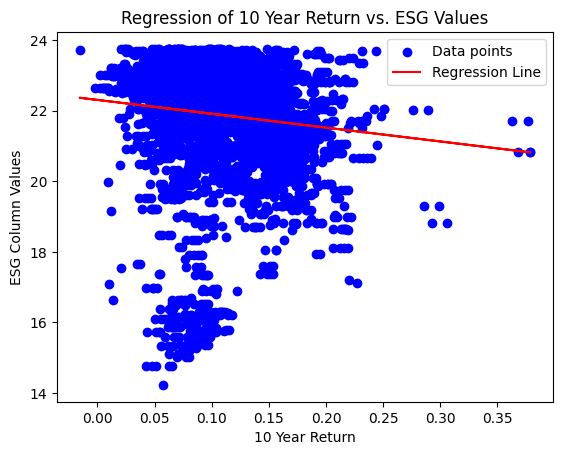

In [ ]:
#Visualization of the 10 year return in relation to the ESG valuse
plt.scatter(return_ten_years, esg_colum, label='Data points', color='blue')

plt.plot(return_ten_years, model.fittedvalues, label='Regression Line', color='red')


plt.xlabel('10 Year Return')
plt.ylabel('ESG Column Values')
plt.title('Regression of 10 Year Return vs. ESG Values')


plt.legend()


plt.show()